In [202]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

# Image Processing

In [2]:
indoor_train_path = 'museum_train/indoor/'
outdoor_train_path = 'museum_train/outdoor/'

In [1]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((224, 224))  
        img = img.convert('L')  
        img = np.array(img).flatten()  
        img = img/255
        images.append(img)
        labels.append(label)
    return images, labels

In [189]:
indoor_train_images, indoor_train_labels = load_images_from_folder(indoor_train_path, label=0)
outdoor_train_images, outdoor_train_labels = load_images_from_folder(outdoor_train_path, label=1)

In [191]:
X = np.array(indoor_train_images + outdoor_train_images)
y = np.array(indoor_train_labels + outdoor_train_labels)

# Splitting the dataset

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

In [197]:
clf = DecisionTreeClassifier(
    criterion='gini',  
    max_depth=10,  
    splitter='best',
    min_samples_split=2,
    min_samples_leaf=20,
    class_weight='balanced',  
    max_features='sqrt',
    random_state=42
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_leaf=20,
                       random_state=42)

# Metrics Evaluation

Accuracy: 68.60%
Precision: 69.23%
Recall: 65.59%
F1 Score: 67.36%


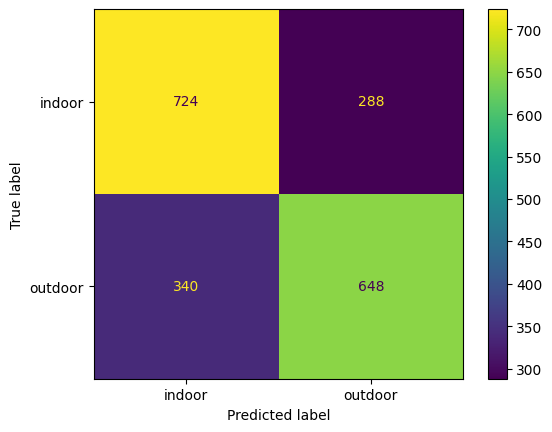

In [203]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

In [218]:
import pickle

model_pkl_file = "museum_model_dt.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(clf, file)

In [219]:
def load_single_images(image):
    img = Image.open(image)
    img = img.resize((224, 224))  
    img = img.convert('L')  
    img = np.array(img).flatten()  
    img = img/255
    return img

In [225]:
my_img = load_single_images('0000005.jpg')

In [226]:
clf.predict(my_img.reshape(1,-1))

array([0])